#### Elastic net Regression
1. Ridge---add penalty(lambda)--->complex---->model performance will be low(doesn't make slopes to zero)
2. Lasso----removes unwanted features----->loss of information
- Elastic Net
    - combination of lasso and ridge
    - costfunction+(lamda*(slope)^2)+(lambda*|slope|)  
    - works well if we have big dataset

In [3]:
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()

In [5]:
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["Target"]=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [11]:
x=boston_df[boston_df.columns[:-1]]
y=boston_df["Target"]
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scale=scale.fit_transform(x)
x_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [57]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,train_size=0.7,random_state=42)
model=ElasticNet(alpha=1)
model.fit(x_train,y_train)

ElasticNet(alpha=1)

In [58]:
y_pred=model.predict(x_test)


In [59]:
model.score(x_train,y_train)

0.6595827009564947

In [60]:
model.score(x_test,y_test)

0.6330719847370372

In [61]:
model.coef_

array([-0.43123542,  0.        , -0.17967342,  0.59876755, -0.20584545,
        2.39148464, -0.        , -0.        , -0.        , -0.25930078,
       -1.24929932,  0.53074402, -2.50983769])

In [2]:
##Try to load the insurance ann predict using regression algorithms
import pandas as pd
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

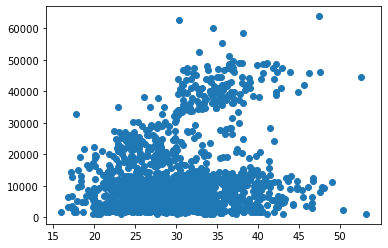

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df["bmi"],df["charges"])

In [5]:
df.replace('female',0,inplace=True)
df.replace('male',1,inplace=True)

In [6]:
df.replace('yes',0,inplace=True)
df.replace('no',1,inplace=True)

In [7]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df.replace('southwest',0,inplace=True)
df.replace('southeast',1,inplace=True)
df.replace('northwest',2,inplace=True)
df.replace('northeast',3,inplace=True)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [10]:
x=df.iloc[:,:6]
y=df["charges"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=25)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)


In [12]:
model.score(x_train,y_train)

0.7568932401931163

In [13]:
model.score(x_test,y_test)

0.732942111488611

In [14]:
from sklearn.preprocessing import PolynomialFeatures
# poly=PolynomialFeatures(degree=3)
# x_poly=poly.fit_transform(x)
from sklearn.metrics import r2_score
acc=[]
for i in range(2,20):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)
    y_pred=model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)


In [15]:
print(acc)

[53.47204775727281, 67.1298944195765, 82.95015341084458, 83.23777667092659, 90.44349793622585, 93.68929607521598, 95.42059343744464, 95.23454443723696, 95.95303189929389, 97.36063309835473, 97.51934523006327, 97.288094717299, 96.70143081102019, 96.17402698914997, 96.09028885321965, 89.89890859581455, 82.68755249528029, 96.14630437225487]


In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=8)
x_poly=poly.fit_transform(x)
model=LinearRegression()
model.fit(x_poly,y)
y_pred=model.predict(x_poly)

In [23]:
r2_score(y,y_pred)*100

95.42059343744464